<a href="https://colab.research.google.com/github/digenaldo/8am/blob/master/testando_graficos_digenaldo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-57-c051fa35cc6f>:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  bar1 = sns.barplot(x=media_tempo.index, y=media_tempo, ci='sd', palette=paleta, ax=ax1)
<ipython-input-57-c051fa35cc6f>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar1 = sns.barplot(x=media_tempo.index, y=media_tempo, ci='sd', palette=paleta, ax=ax1)
<ipython-input-57-c051fa35cc6f>:25: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  bar1 = sns.barplot(x=media_tempo.index, y=media_tempo, ci='sd', palette=paleta, ax=ax1)
<ipython-input-57-c051fa35cc6f>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(media_tempo.index.tolist(), rotation=45, ha='right')
<ipython-input-57-c051fa35cc6f>:35: FutureWarning: 

The `ci` para

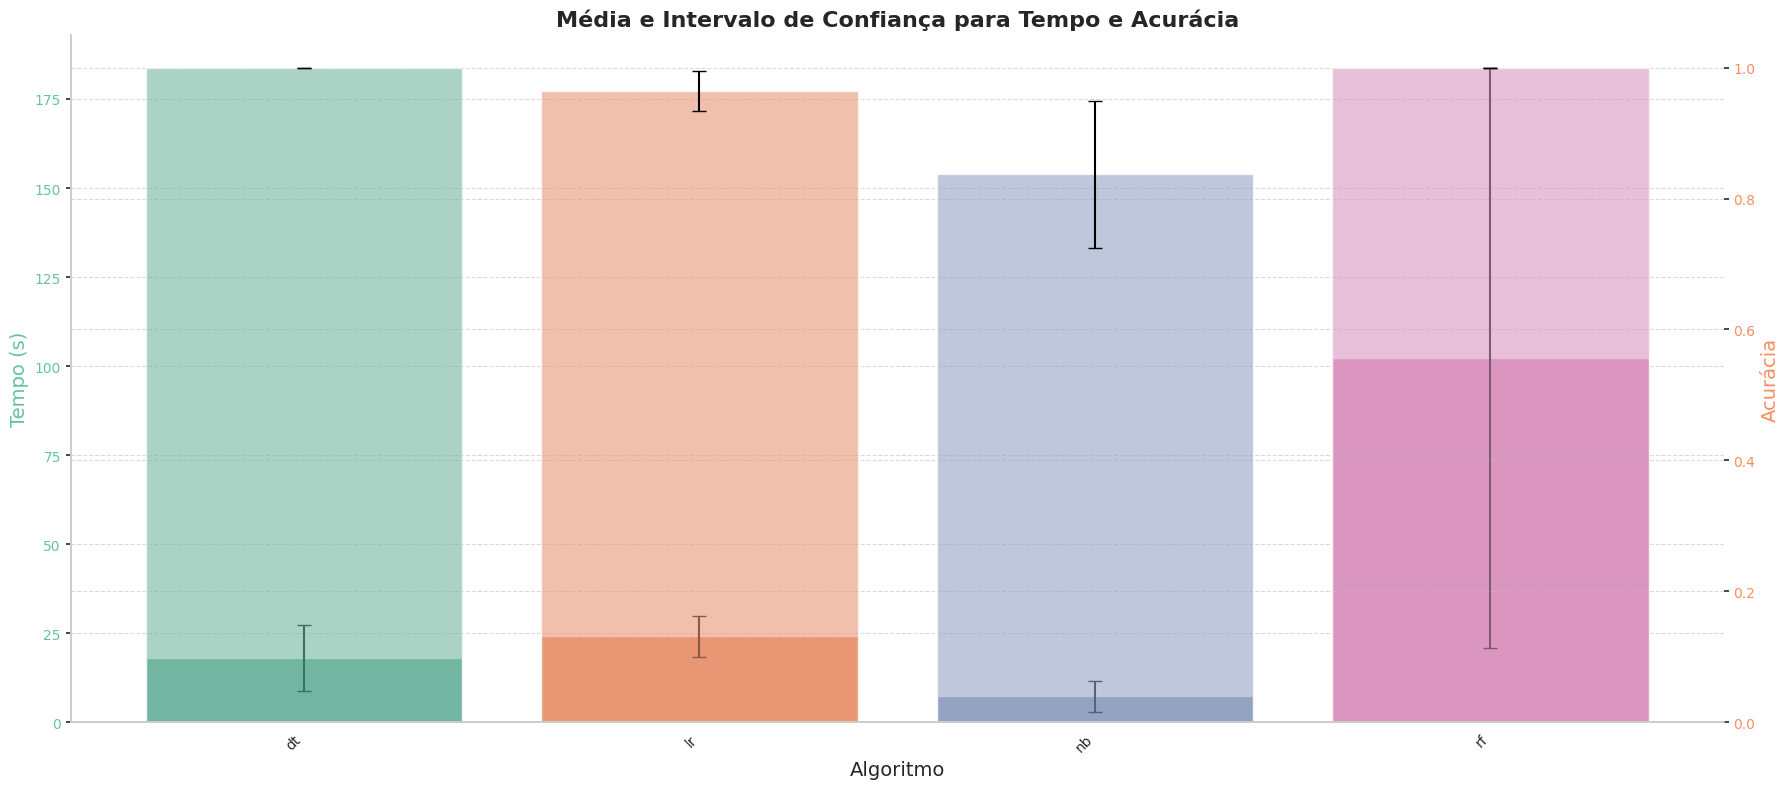

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = 'resultado.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Calcular a média e o intervalo de confiança
media_tempo = resultados.groupby('algoritmo')['tempo'].mean()
intervalo_confianca_tempo = resultados.groupby('algoritmo')['tempo'].std()

media_acuracia = resultados.groupby('algoritmo')['acuracia'].mean()
intervalo_confianca_acuracia = resultados.groupby('algoritmo')['acuracia'].std()

# Criar o gráfico
fig, ax1 = plt.subplots(figsize=(18, 8))

# Definir a paleta de cores
paleta = sns.color_palette("Set2")

# Gráfico de barras para o tempo
bar1 = sns.barplot(x=media_tempo.index, y=media_tempo, ci='sd', palette=paleta, ax=ax1)
ax1.errorbar(x=range(len(media_tempo)), y=media_tempo, yerr=intervalo_confianca_tempo, fmt='none', color='black', capsize=5)
ax1.set_title('Média e Intervalo de Confiança para Tempo e Acurácia', fontsize=16, weight='bold')
ax1.set_xlabel('Algoritmo', fontsize=14)
ax1.set_ylabel('Tempo (s)', fontsize=14, color=paleta[0])
ax1.tick_params(axis='y', labelcolor=paleta[0])
ax1.set_xticklabels(media_tempo.index.tolist(), rotation=45, ha='right')

# Criar um segundo eixo y para a acurácia
ax2 = ax1.twinx()
bar2 = sns.barplot(x=media_acuracia.index, y=media_acuracia, ci='sd', palette=paleta, ax=ax2, alpha=0.6)
ax2.errorbar(x=range(len(media_acuracia)), y=media_acuracia, yerr=intervalo_confianca_acuracia, fmt='none', color='black', capsize=5)
ax2.set_ylabel('Acurácia', fontsize=14, color=paleta[1])
ax2.tick_params(axis='y', labelcolor=paleta[1])

# Ajustar a aparência geral dos gráficos
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    ax.xaxis.set_tick_params(width=1.2)
    ax.yaxis.set_tick_params(width=1.2)

plt.tight_layout()
plt.savefig("media_intervalo_confianca_duplo.png", bbox_inches='tight')
plt.show()


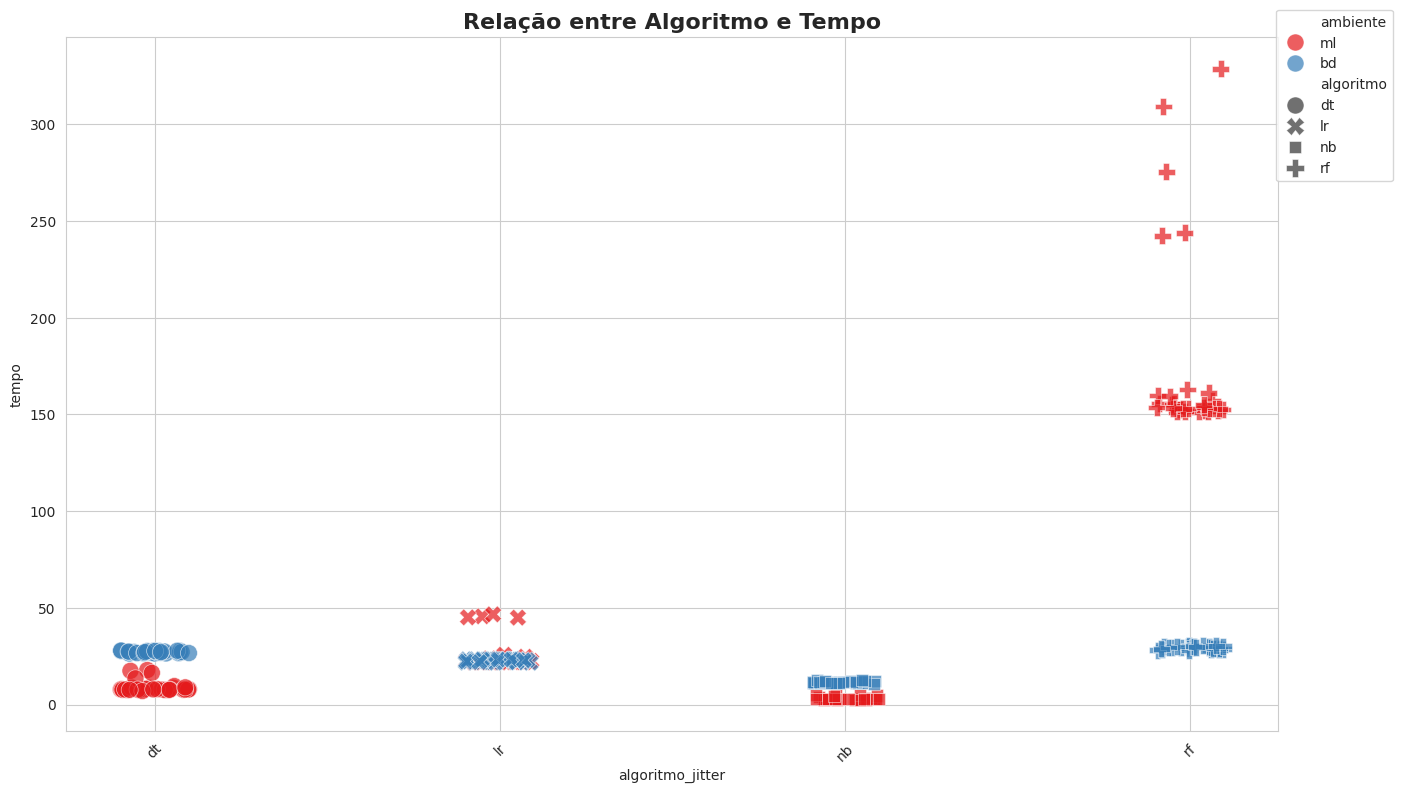

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Adicionando jitter manualmente
def add_jitter(series, jitter_amount=0.1):
    return series + np.random.uniform(-jitter_amount, jitter_amount, len(series))

# Adicionando jitter à coluna 'algoritmo'
resultados['algoritmo_jitter'] = add_jitter(resultados['algoritmo'].astype('category').cat.codes)

# Definindo o estilo dos plots
sns.set_style("whitegrid")

# Criando o scatter plot com bolhas coloridas por ambiente e diferentes símbolos por algoritmo
plt.figure(figsize=(14, 8))
sns.scatterplot(
    x="algoritmo_jitter",
    y="tempo",
    hue="ambiente",
    style="algoritmo",
    data=resultados,
    s=150,  # Tamanho das bolhas
    alpha=0.7,  # Transparência das bolhas
    palette="Set1",
    edgecolor="w",  # Cor da borda das bolhas
    linewidth=0.5  # Largura da borda das bolhas
)

# Ajustando os rótulos do eixo x para mostrar os nomes dos algoritmos
plt.xticks(ticks=range(len(resultados['algoritmo'].unique())), labels=resultados['algoritmo'].unique(), rotation=45)

# Adicionando título
plt.title("Relação entre Algoritmo e Tempo", fontsize=16, weight='bold')

# Ajustando as legendas
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.05), ncol=1)

# Salvando e mostrando o plot
plt.tight_layout()
plt.savefig("scatter_bubbles_algoritmo_tempo.png", bbox_inches='tight')
plt.show()


<ipython-input-70-aa1c58cfaa6b>:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  bar1 = sns.barplot(x=media_tempo.index, y=media_tempo, ci='sd', palette=paleta, ax=ax1)
<ipython-input-70-aa1c58cfaa6b>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar1 = sns.barplot(x=media_tempo.index, y=media_tempo, ci='sd', palette=paleta, ax=ax1)
<ipython-input-70-aa1c58cfaa6b>:30: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  bar1 = sns.barplot(x=media_tempo.index, y=media_tempo, ci='sd', palette=paleta, ax=ax1)
<ipython-input-70-aa1c58cfaa6b>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(media_tempo.index.tolist(), rotation=45, ha='right')
<ipython-input-70-aa1c58cfaa6b>:40: FutureWarning: 

The `ci` para

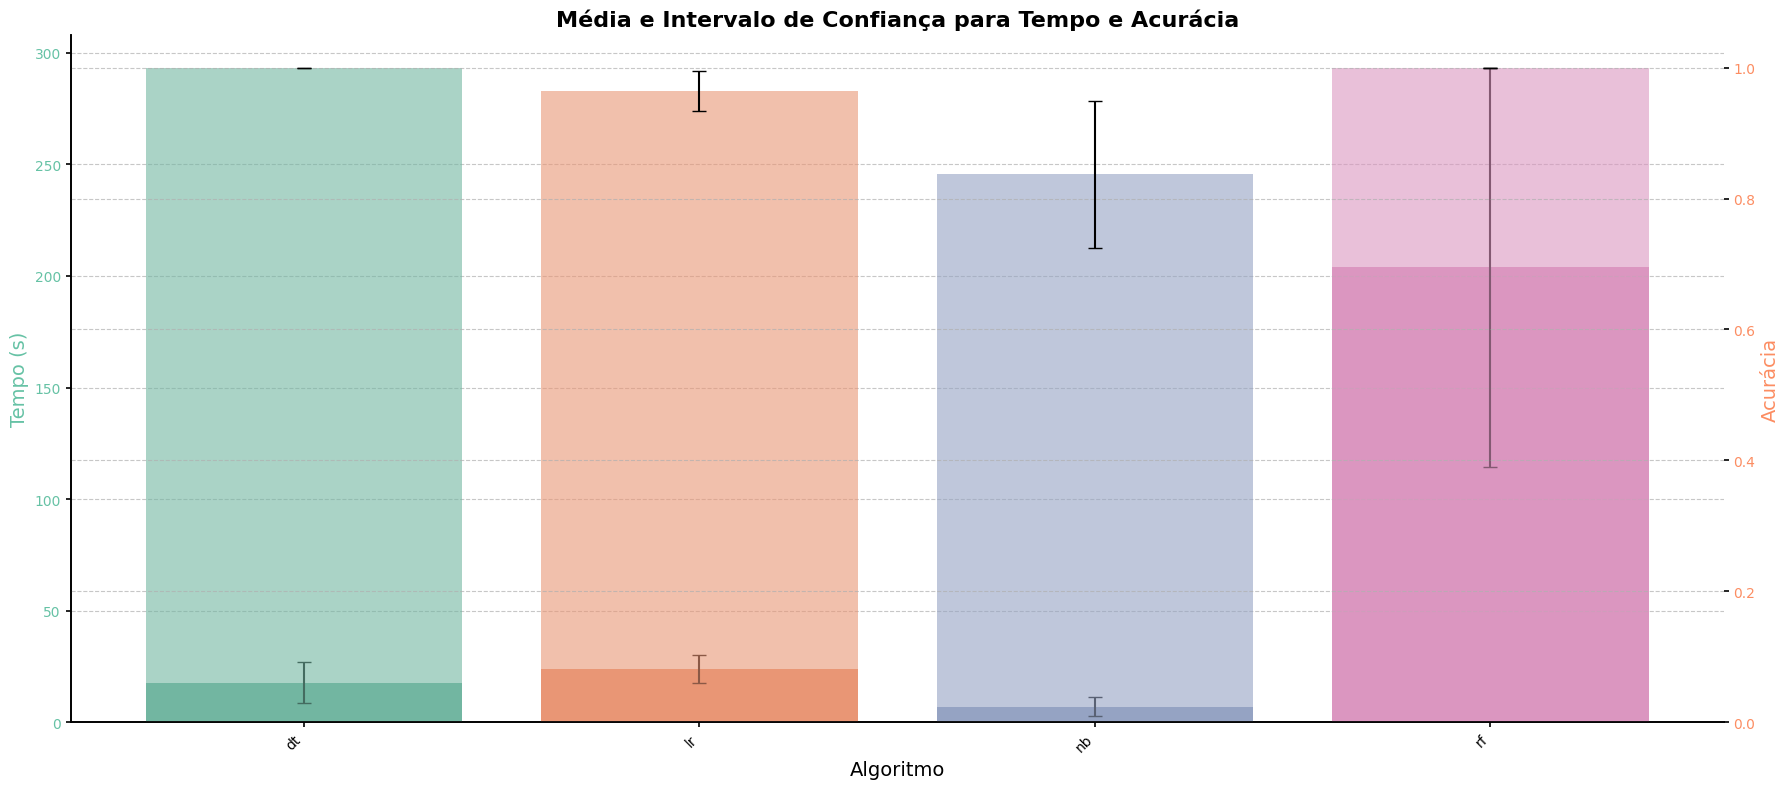

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = 'resultado.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números da coluna 'iteracoes_tempo' e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
# Extrair os números da coluna 'iteracoes_acuracia' e converter para floats
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular a média e o intervalo de confiança
media_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].std()

# Criar o gráfico
fig, ax1 = plt.subplots(figsize=(18, 8))

# Definir a paleta de cores
paleta = sns.color_palette("Set2")

# Gráfico de barras para o tempo
bar1 = sns.barplot(x=media_tempo.index, y=media_tempo, ci='sd', palette=paleta, ax=ax1)
ax1.errorbar(x=range(len(media_tempo)), y=media_tempo, yerr=intervalo_confianca_tempo, fmt='none', color='black', capsize=5)
ax1.set_title('Média e Intervalo de Confiança para Tempo e Acurácia', fontsize=16, weight='bold')
ax1.set_xlabel('Algoritmo', fontsize=14)
ax1.set_ylabel('Tempo (s)', fontsize=14, color=paleta[0])
ax1.tick_params(axis='y', labelcolor=paleta[0])
ax1.set_xticklabels(media_tempo.index.tolist(), rotation=45, ha='right')

# Criar um segundo eixo y para a acurácia
ax2 = ax1.twinx()
bar2 = sns.barplot(x=media_acuracia.index, y=media_acuracia, ci='sd', palette=paleta, ax=ax2, alpha=0.6)
ax2.errorbar(x=range(len(media_acuracia)), y=media_acuracia, yerr=intervalo_confianca_acuracia, fmt='none', color='black', capsize=5)
ax2.set_ylabel('Acurácia', fontsize=14, color=paleta[1])
ax2.tick_params(axis='y', labelcolor=paleta[1])

# Ajustar a aparência geral dos gráficos
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    ax.xaxis.set_tick_params(width=1.2)
    ax.yaxis.set_tick_params(width=1.2)

plt.tight_layout()
plt.savefig("media_intervalo_confianca_duplo.png", bbox_inches='tight')
plt.show()


<ipython-input-90-665e9bf9ad64>:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  bar1 = sns.barplot(x=media_tempo.index, y=media_tempo, ci='sd', palette=paleta)
<ipython-input-90-665e9bf9ad64>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar1 = sns.barplot(x=media_tempo.index, y=media_tempo, ci='sd', palette=paleta)
<ipython-input-90-665e9bf9ad64>:30: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  bar1 = sns.barplot(x=media_tempo.index, y=media_tempo, ci='sd', palette=paleta)
<ipython-input-90-665e9bf9ad64>:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  bar2 = sns.barplot(x=media_acuracia.index, y=media_acuracia, ci='sd', palette=paleta, alpha=0.6)
<ipython-input-90-665e9bf9ad64>:40: FutureWarnin

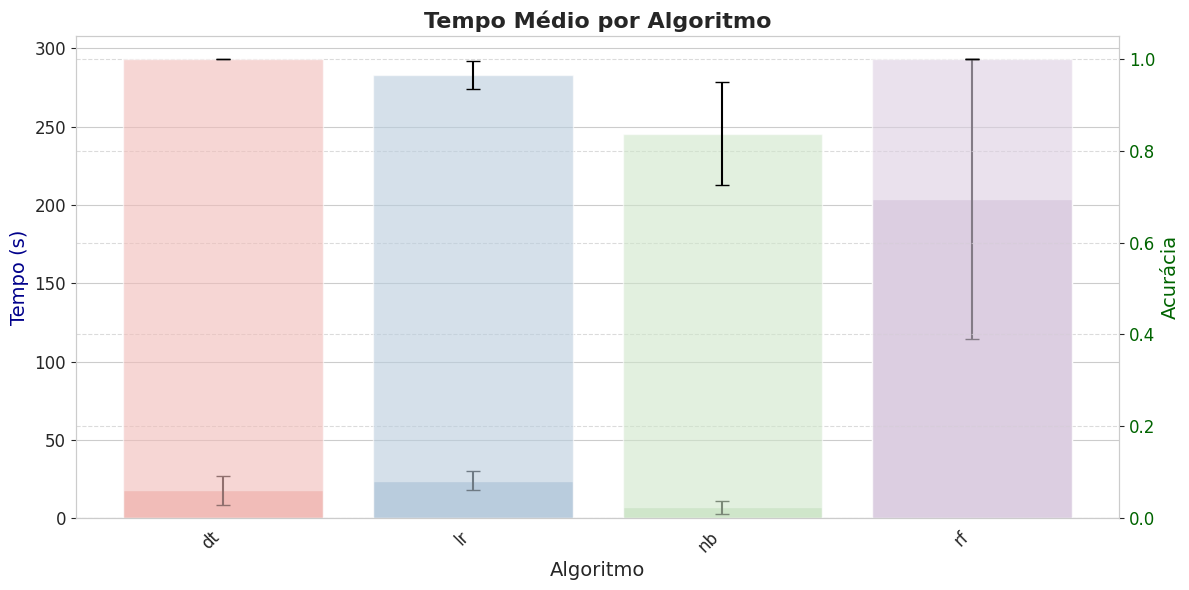

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = 'resultado.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números da coluna 'iteracoes_tempo' e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
# Extrair os números da coluna 'iteracoes_acuracia' e converter para floats
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular a média e o intervalo de confiança
media_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].std()

# Criar o gráfico
plt.figure(figsize=(12, 6))

# Definir a paleta de cores
paleta = sns.color_palette("Pastel1")

# Gráfico de barras para o tempo
bar1 = sns.barplot(x=media_tempo.index, y=media_tempo, ci='sd', palette=paleta)
plt.errorbar(x=range(len(media_tempo)), y=media_tempo, yerr=intervalo_confianca_tempo, fmt='none', color='black', capsize=5)
plt.title('Tempo Médio por Algoritmo', fontsize=16, weight='bold')
plt.xlabel('Algoritmo', fontsize=14)
plt.ylabel('Tempo (s)', fontsize=14, color='darkblue')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Adicionar eixo secundário para a acurácia
ax2 = plt.twinx()
bar2 = sns.barplot(x=media_acuracia.index, y=media_acuracia, ci='sd', palette=paleta, alpha=0.6)
plt.errorbar(x=range(len(media_acuracia)), y=media_acuracia, yerr=intervalo_confianca_acuracia, fmt='none', color='black', capsize=5)
ax2.set_ylabel('Acurácia', fontsize=14, color='darkgreen')
ax2.tick_params(axis='y', labelcolor='darkgreen', labelsize=12)

# Ajustar a aparência geral dos gráficos
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo.png", bbox_inches='tight')
plt.show()


<ipython-input-3-43b05c80b784>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar1 = sns.barplot(x=media_tempo.index, y=media_tempo, palette=paleta)
<ipython-input-3-43b05c80b784>:30: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  bar1 = sns.barplot(x=media_tempo.index, y=media_tempo, palette=paleta)
<ipython-input-3-43b05c80b784>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar2 = sns.barplot(x=media_acuracia.index, y=media_acuracia, palette=paleta, alpha=0.6)
<ipython-input-3-43b05c80b784>:56: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  bar2 = sns.barplot(x=media_acuracia.index, y=media_acuracia, palette

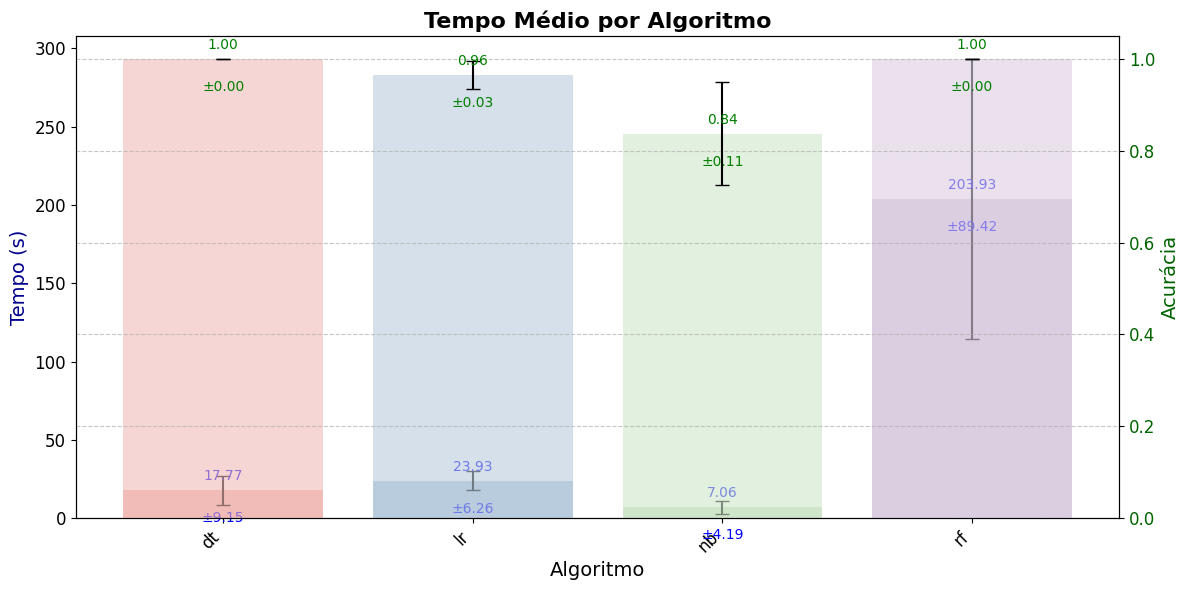

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = 'resultado.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números da coluna 'iteracoes_tempo' e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
# Extrair os números da coluna 'iteracoes_acuracia' e converter para floats
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular a média e o intervalo de confiança
media_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].std()

# Criar o gráfico
plt.figure(figsize=(12, 6))

# Definir a paleta de cores
paleta = sns.color_palette("Pastel1")

# Gráfico de barras para o tempo
bar1 = sns.barplot(x=media_tempo.index, y=media_tempo, palette=paleta)
plt.errorbar(x=range(len(media_tempo)), y=media_tempo, yerr=intervalo_confianca_tempo, fmt='none', color='black', capsize=5)

# Anotar média e intervalo de confiança para tempo
for i in range(len(media_tempo)):
    plt.annotate(f'{media_tempo[i]:.2f}',
                 xy=(i, media_tempo[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='blue')
    plt.annotate(f'±{intervalo_confianca_tempo[i]:.2f}',
                 xy=(i, media_tempo[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='blue')

plt.title('Tempo Médio por Algoritmo', fontsize=16, weight='bold')
plt.xlabel('Algoritmo', fontsize=14)
plt.ylabel('Tempo (s)', fontsize=14, color='darkblue')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Adicionar eixo secundário para a acurácia
ax2 = plt.twinx()
bar2 = sns.barplot(x=media_acuracia.index, y=media_acuracia, palette=paleta, alpha=0.6)
plt.errorbar(x=range(len(media_acuracia)), y=media_acuracia, yerr=intervalo_confianca_acuracia, fmt='none', color='black', capsize=5)

# Anotar média e intervalo de confiança para acurácia
for i in range(len(media_acuracia)):
    ax2.annotate(f'{media_acuracia[i]:.2f}',
                 xy=(i, media_acuracia[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=10, color='green')
    ax2.annotate(f'±{intervalo_confianca_acuracia[i]:.2f}',
                 xy=(i, media_acuracia[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=10, color='green')

ax2.set_ylabel('Acurácia', fontsize=14, color='darkgreen')
ax2.tick_params(axis='y', labelcolor='darkgreen', labelsize=12)

# Ajustar a aparência geral dos gráficos
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo.png", bbox_inches='tight')
plt.show()


<ipython-input-49-01e0ee9aefc1>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar1 = sns.barplot(x=media_tempo.index, y=media_tempo, palette=paleta)
<ipython-input-49-01e0ee9aefc1>:30: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  bar1 = sns.barplot(x=media_tempo.index, y=media_tempo, palette=paleta)
<ipython-input-49-01e0ee9aefc1>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar2 = sns.barplot(x=media_acuracia.index, y=media_acuracia, palette=paleta, alpha=0.6)
<ipython-input-49-01e0ee9aefc1>:58: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  bar2 = sns.barplot(x=media_acuracia.index, y=media_acuracia, pal

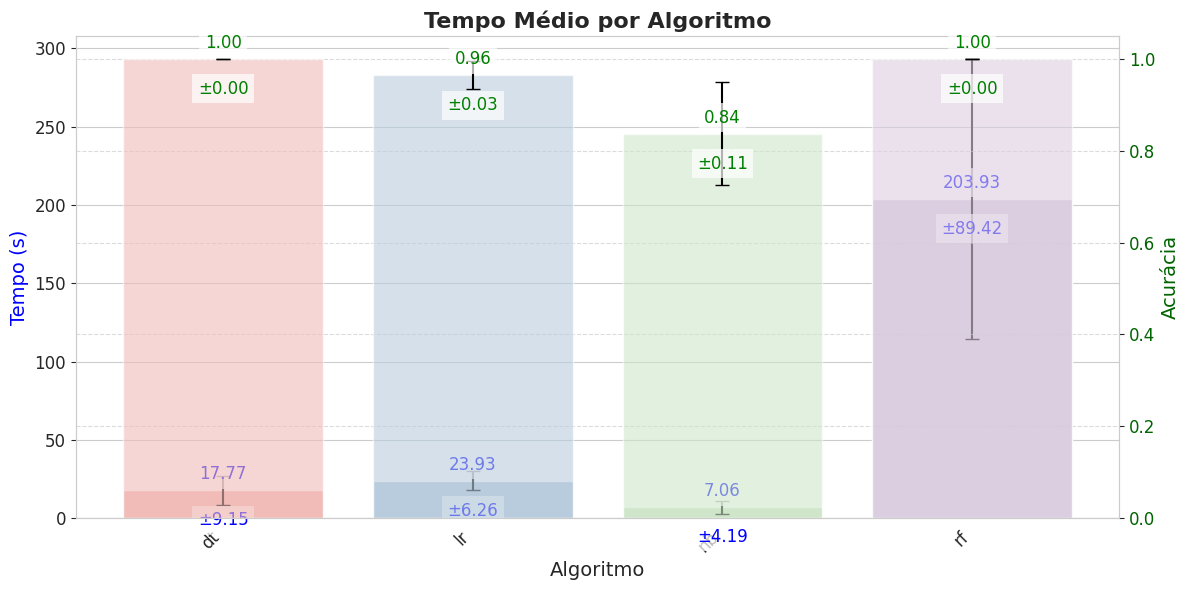

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nome do arquivo CSV com os resultados
arquivo_resultados = 'resultado.csv'

# Carregar os dados do arquivo CSV
resultados = pd.read_csv(arquivo_resultados)

# Extrair os números da coluna 'iteracoes_tempo' e converter para floats
resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
# Extrair os números da coluna 'iteracoes_acuracia' e converter para floats
resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

# Calcular a média e o intervalo de confiança
media_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].mean()
intervalo_confianca_tempo = resultados.groupby('algoritmo')['iteracoes_tempo'].std()

media_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].mean()
intervalo_confianca_acuracia = resultados.groupby('algoritmo')['iteracoes_acuracia'].std()

# Criar o gráfico
plt.figure(figsize=(12, 6))

# Definir a paleta de cores
paleta = sns.color_palette("Pastel1")

# Gráfico de barras para o tempo
bar1 = sns.barplot(x=media_tempo.index, y=media_tempo, palette=paleta)
plt.errorbar(x=range(len(media_tempo)), y=media_tempo, yerr=intervalo_confianca_tempo, fmt='none', color='black', capsize=5)

# Anotar média e intervalo de confiança para tempo
for i in range(len(media_tempo)):
    plt.annotate(f'{media_tempo[i]:.2f}',
                 xy=(i, media_tempo[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=12, color='blue',
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    plt.annotate(f'±{intervalo_confianca_tempo[i]:.2f}',
                 xy=(i, media_tempo[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=12, color='blue',
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title('Tempo Médio por Algoritmo', fontsize=16, weight='bold')
plt.xlabel('Algoritmo', fontsize=14)
plt.ylabel('Tempo (s)', fontsize=14, color='blue')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Adicionar eixo secundário para a acurácia
ax2 = plt.twinx()
bar2 = sns.barplot(x=media_acuracia.index, y=media_acuracia, palette=paleta, alpha=0.6)
plt.errorbar(x=range(len(media_acuracia)), y=media_acuracia, yerr=intervalo_confianca_acuracia, fmt='none', color='black', capsize=5)

# Anotar média e intervalo de confiança para acurácia
for i in range(len(media_acuracia)):
    ax2.annotate(f'{media_acuracia[i]:.2f}',
                 xy=(i, media_acuracia[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=12, color='green',
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax2.annotate(f'±{intervalo_confianca_acuracia[i]:.2f}',
                 xy=(i, media_acuracia[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=12, color='green',
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

ax2.set_ylabel('Acurácia', fontsize=14, color='darkgreen')
ax2.tick_params(axis='y', labelcolor='darkgreen', labelsize=12)

# Ajustar a aparência geral dos gráficos
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo.png", bbox_inches='tight')
plt.show()


<ipython-input-56-5c14d8a41084>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar1 = sns.barplot(x=media_tempo.index, y=media_tempo, palette=paleta)
<ipython-input-56-5c14d8a41084>:8: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  bar1 = sns.barplot(x=media_tempo.index, y=media_tempo, palette=paleta)
<ipython-input-56-5c14d8a41084>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar2 = sns.barplot(x=media_acuracia.index, y=media_acuracia, palette=paleta, alpha=0.6)
<ipython-input-56-5c14d8a41084>:36: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  bar2 = sns.barplot(x=media_acuracia.index, y=media_acuracia, palet

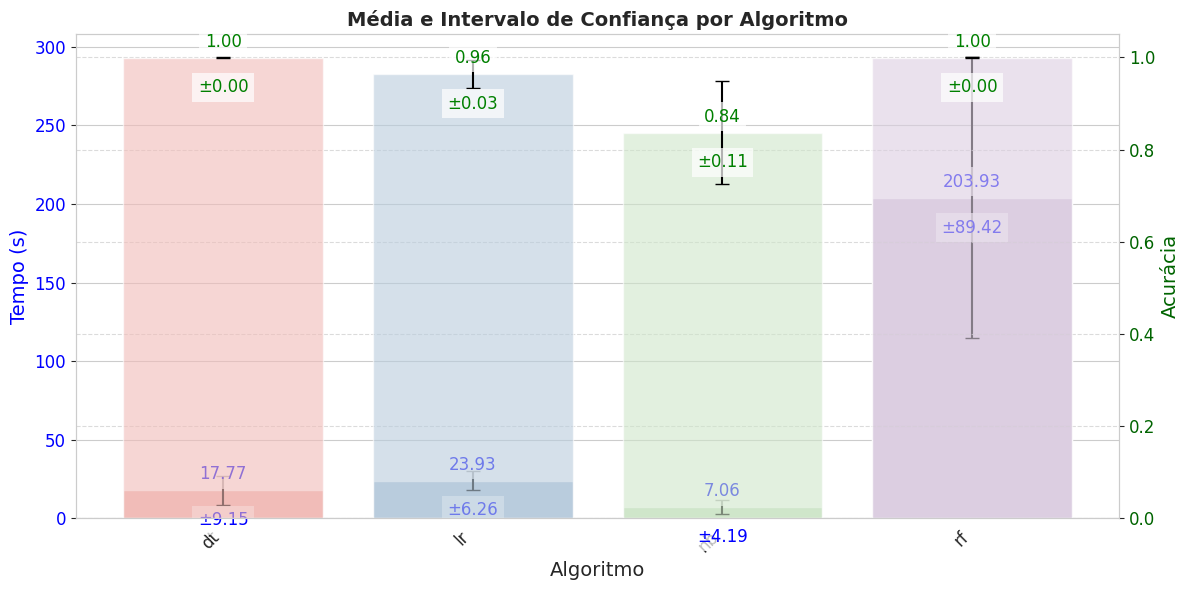

In [56]:
# Criar o gráfico
plt.figure(figsize=(12, 6))

# Definir a paleta de cores
paleta = sns.color_palette("Pastel1")

# Gráfico de barras para o tempo
bar1 = sns.barplot(x=media_tempo.index, y=media_tempo, palette=paleta)
plt.errorbar(x=range(len(media_tempo)), y=media_tempo, yerr=intervalo_confianca_tempo, fmt='none', color='black', capsize=5)

# Anotar média e intervalo de confiança para tempo
for i in range(len(media_tempo)):
    plt.annotate(f'{media_tempo[i]:.2f}',
                 xy=(i, media_tempo[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=12, color='blue',
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    plt.annotate(f'±{intervalo_confianca_tempo[i]:.2f}',
                 xy=(i, media_tempo[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=12, color='blue',
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title('Média e Intervalo de Confiança por Algoritmo', fontsize=14, weight='bold')
plt.xlabel('Algoritmo', fontsize=14)
plt.ylabel('Tempo (s)', fontsize=14, color='blue')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12, color='blue')  # Definindo a cor azul para a numeração do eixo y

# Adicionar eixo secundário para a acurácia
ax2 = plt.twinx()
bar2 = sns.barplot(x=media_acuracia.index, y=media_acuracia, palette=paleta, alpha=0.6)
plt.errorbar(x=range(len(media_acuracia)), y=media_acuracia, yerr=intervalo_confianca_acuracia, fmt='none', color='black', capsize=5)

# Anotar média e intervalo de confiança para acurácia
for i in range(len(media_acuracia)):
    ax2.annotate(f'{media_acuracia[i]:.2f}',
                 xy=(i, media_acuracia[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=12, color='green',
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax2.annotate(f'±{intervalo_confianca_acuracia[i]:.2f}',
                 xy=(i, media_acuracia[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=12, color='green',
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

ax2.set_ylabel('Acurácia', fontsize=14, color='darkgreen')
ax2.tick_params(axis='y', labelcolor='darkgreen', labelsize=12)

# Ajustar a aparência geral dos gráficos
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo.png", bbox_inches='tight')
plt.show()


<ipython-input-105-8b136c978fa3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar1 = sns.barplot(x=media_tempo.index, y=media_tempo, palette=paleta)
<ipython-input-105-8b136c978fa3>:8: UserWarning: The palette list has more values (12) than needed (4), which may not be intended.
  bar1 = sns.barplot(x=media_tempo.index, y=media_tempo, palette=paleta)
<ipython-input-105-8b136c978fa3>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar2 = sns.barplot(x=media_acuracia.index, y=media_acuracia, palette=paleta, alpha=0.6)
<ipython-input-105-8b136c978fa3>:36: UserWarning: The palette list has more values (12) than needed (4), which may not be intended.
  bar2 = sns.barplot(x=media_acuracia.index, y=media_acuracia,

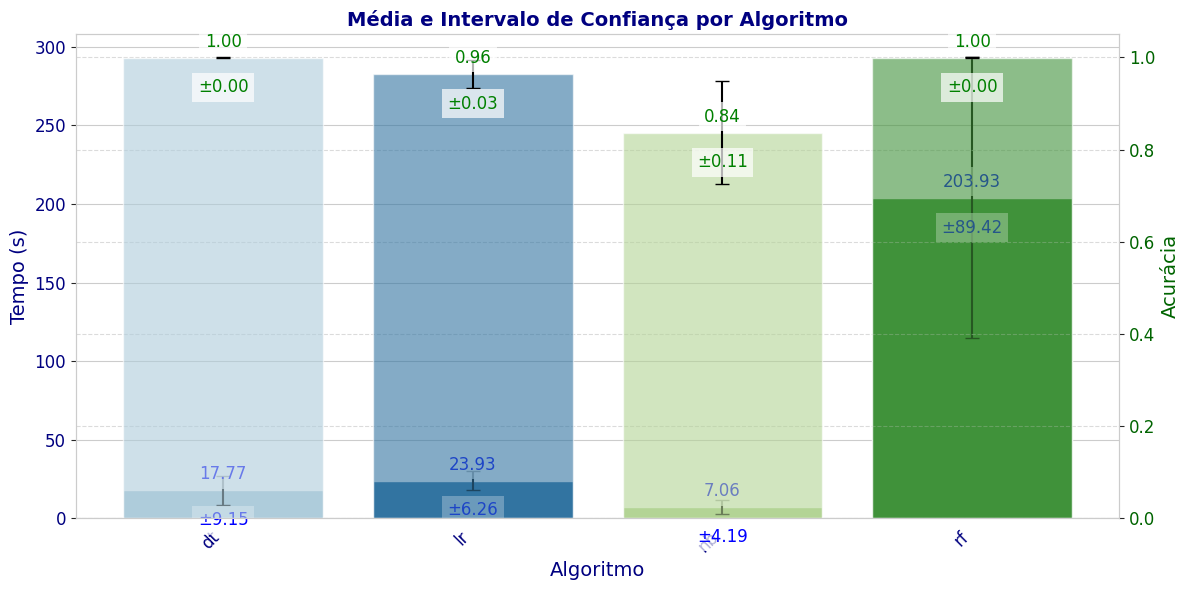

In [105]:
# Criar o gráfico
plt.figure(figsize=(12, 6))

# Definir a paleta de cores
paleta = sns.color_palette("Paired")

# Gráfico de barras para o tempo
bar1 = sns.barplot(x=media_tempo.index, y=media_tempo, palette=paleta)
plt.errorbar(x=range(len(media_tempo)), y=media_tempo, yerr=intervalo_confianca_tempo, fmt='none', color='black', capsize=5)

# Anotar média e intervalo de confiança para tempo
for i in range(len(media_tempo)):
    plt.annotate(f'{media_tempo[i]:.2f}',
                 xy=(i, media_tempo[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=12, color='blue',
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    plt.annotate(f'±{intervalo_confianca_tempo[i]:.2f}',
                 xy=(i, media_tempo[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=12, color='blue',
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title('Média e Intervalo de Confiança por Algoritmo', fontsize=14, weight='bold', color='navy')
plt.xlabel('Algoritmo', fontsize=14, color='navy')
plt.ylabel('Tempo (s)', fontsize=14, color='navy')
plt.xticks(rotation=45, ha='right', fontsize=12, color='navy')
plt.yticks(fontsize=12, color='navy')

# Adicionar eixo secundário para a acurácia
ax2 = plt.twinx()
bar2 = sns.barplot(x=media_acuracia.index, y=media_acuracia, palette=paleta, alpha=0.6)
plt.errorbar(x=range(len(media_acuracia)), y=media_acuracia, yerr=intervalo_confianca_acuracia, fmt='none', color='black', capsize=5)

# Anotar média e intervalo de confiança para acurácia
for i in range(len(media_acuracia)):
    ax2.annotate(f'{media_acuracia[i]:.2f}',
                 xy=(i, media_acuracia[i]),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom',
                 fontsize=12, color='green',
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    ax2.annotate(f'±{intervalo_confianca_acuracia[i]:.2f}',
                 xy=(i, media_acuracia[i]),
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center', va='top',
                 fontsize=12, color='green',
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

ax2.set_ylabel('Acurácia', fontsize=14, color='darkgreen')
ax2.tick_params(axis='y', labelcolor='darkgreen', labelsize=12)

# Ajustar a aparência geral dos gráficos
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("grafico_tempo_acuracia_por_algoritmo.png", bbox_inches='tight')
plt.show()


<ipython-input-108-773181f8d55f>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=12, color='navy')


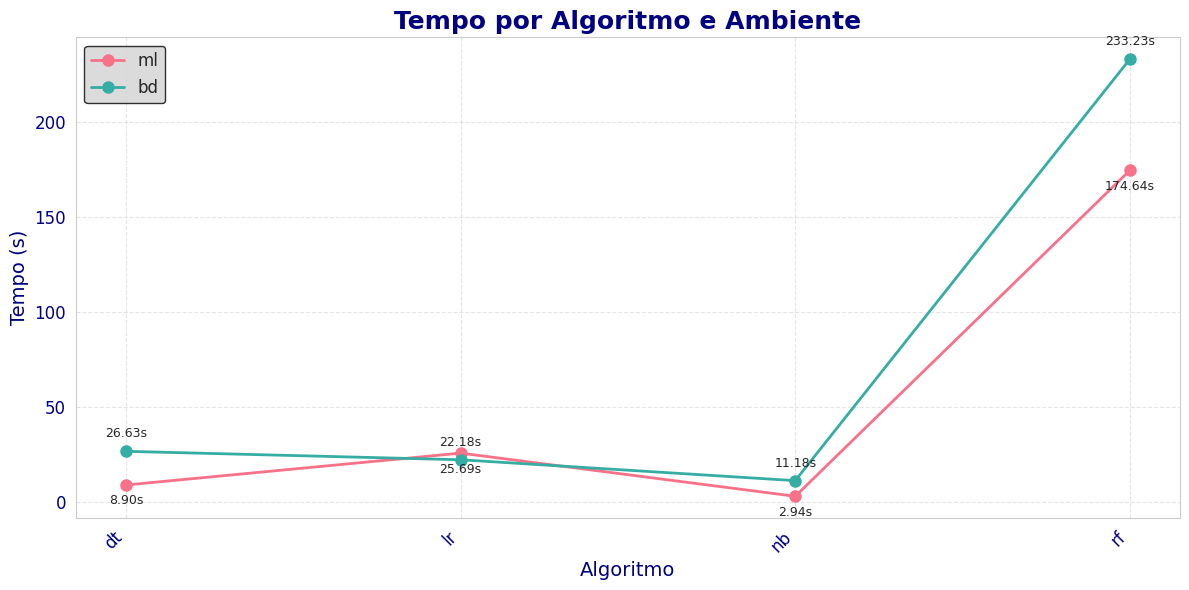

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_tempo(arquivo_resultados):
    # Carregar os dados do arquivo CSV
    resultados = pd.read_csv(arquivo_resultados)
    resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)

    # Criar o gráfico
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Escolher uma paleta de cores mais vibrante
    paleta = sns.color_palette("husl", n_colors=len(resultados['ambiente'].unique()))

    # Mapear cada ambiente para uma cor na paleta
    cores_ambientes = {ambiente: paleta[i] for i, ambiente in enumerate(resultados['ambiente'].unique())}

    grupo_tempo = resultados.groupby(['algoritmo', 'ambiente'])['iteracoes_tempo'].mean().reset_index()

    # Define os deslocamentos verticais para cada ambiente
    deslocamentos_verticais = {'ml': -14, 'bd': 10}  # Ajuste conforme necessário

    for ambiente in resultados['ambiente'].unique():
        dados_ambiente_tempo = grupo_tempo[grupo_tempo['ambiente'] == ambiente]
        deslocamento_vertical = deslocamentos_verticais.get(ambiente, 0)  # Obtém o deslocamento vertical específico para este ambiente
        # Estilo de linhas e marcadores personalizados
        ax1.plot(dados_ambiente_tempo['algoritmo'], dados_ambiente_tempo['iteracoes_tempo'], marker='o', label=f'{ambiente}', color=cores_ambientes[ambiente], linestyle='-', linewidth=2, markersize=8)
        for i, txt in enumerate(dados_ambiente_tempo['iteracoes_tempo']):
            # Anotações personalizadas com fundo transparente
            ax1.annotate(f'{txt:.2f}s', (dados_ambiente_tempo['algoritmo'].iloc[i], dados_ambiente_tempo['iteracoes_tempo'].iloc[i]),
                         textcoords="offset points", xytext=(0, deslocamento_vertical), ha='center', fontsize=9, bbox=dict(facecolor='none', edgecolor='none'))

    # Estilo de títulos e legendas
    ax1.set_title('Tempo por Algoritmo e Ambiente', fontsize=18, weight='bold', color='navy')
    ax1.set_xlabel('Algoritmo', fontsize=14, color='navy')
    ax1.set_ylabel('Tempo (s)', fontsize=14, color='navy')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=12, color='navy')
    ax1.tick_params(axis='y', labelsize=12, colors='navy')
    ax1.legend(loc='upper left', fontsize=12, facecolor='lightgrey', edgecolor='black')

    # Ajustar a aparência geral do gráfico
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig("grafico_tempo_por_algoritmo_e_ambiente.png", dpi=300, bbox_inches='tight', transparent=True)
    plt.show()

plot_tempo('resultado.csv')


<ipython-input-109-6329ad36ac9c>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=12, color='navy')


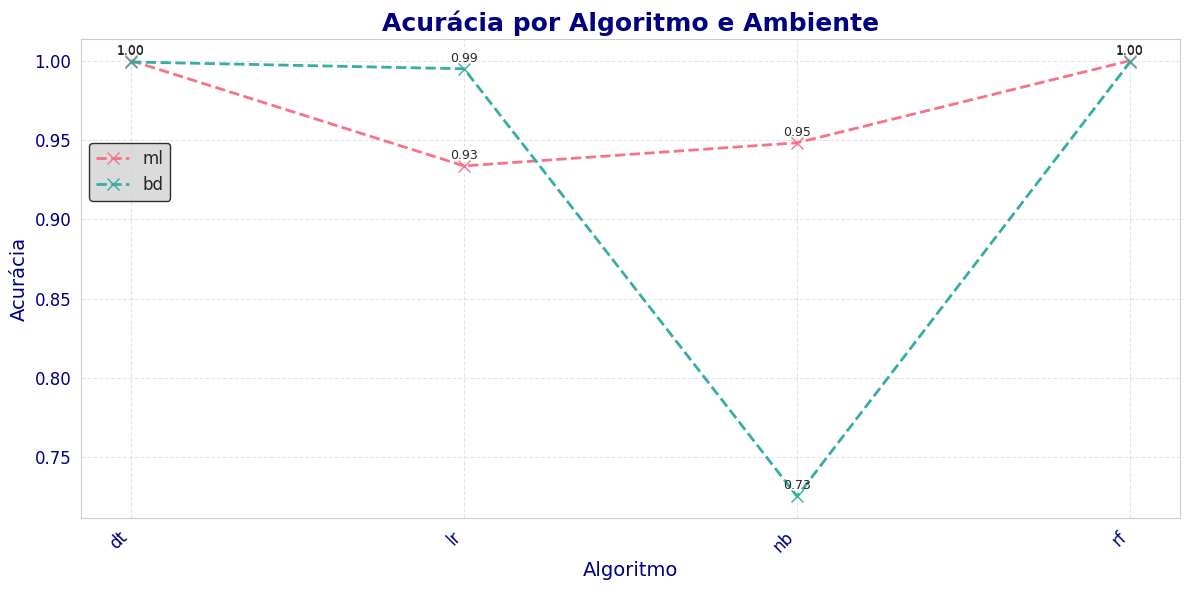

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FormatStrFormatter

def plot_acuracia(arquivo_resultados):
    # Carregar os dados do arquivo CSV
    resultados = pd.read_csv(arquivo_resultados)

    # Extrair os números da coluna 'iteracoes_acuracia' e converter para floats
    resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

    # Criar o gráfico
    fig, ax2 = plt.subplots(figsize=(12, 6))

    # Escolher uma paleta de cores mais vibrante
    paleta = sns.color_palette("husl", n_colors=len(resultados['ambiente'].unique()))  # Usando a mesma paleta do gráfico de tempo

    # Mapear cada ambiente para uma cor na paleta
    cores_ambientes = {ambiente: paleta[i] for i, ambiente in enumerate(resultados['ambiente'].unique())}

    grupo_acuracia = resultados.groupby(['algoritmo', 'ambiente'])['iteracoes_acuracia'].mean().reset_index()

    for ambiente in resultados['ambiente'].unique():
        dados_ambiente_acuracia = grupo_acuracia[grupo_acuracia['ambiente'] == ambiente]
        # Estilo de linhas e marcadores personalizados
        ax2.plot(dados_ambiente_acuracia['algoritmo'], dados_ambiente_acuracia['iteracoes_acuracia'], marker='x', linestyle='--', label=f'{ambiente}', color=cores_ambientes[ambiente], linewidth=2, markersize=8)
        for i, txt in enumerate(dados_ambiente_acuracia['iteracoes_acuracia']):
            # Anotações personalizadas com fundo transparente
            ax2.annotate(f'{txt:.2f}', (dados_ambiente_acuracia['algoritmo'].iloc[i], dados_ambiente_acuracia['iteracoes_acuracia'].iloc[i]),
                         textcoords="offset points", xytext=(0,5), ha='center', fontsize=9, bbox=dict(facecolor='none', edgecolor='none'))

    # Estilo de títulos e legendas
    ax2.set_title('Acurácia por Algoritmo e Ambiente', fontsize=18, weight='bold', color='navy')
    ax2.set_xlabel('Algoritmo', fontsize=14, color='navy')
    ax2.set_ylabel('Acurácia', fontsize=14, color='navy')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=12, color='navy')
    ax2.tick_params(axis='y', labelsize=12, colors='navy')
    ax2.legend(loc='upper left', fontsize=12, facecolor='lightgrey', edgecolor='black', bbox_to_anchor=(0, 0.8))

    # Ajustar a aparência geral do gráfico
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig("grafico_acuracia_por_algoritmo_e_ambiente.png", dpi=300, bbox_inches='tight', transparent=True)
    plt.show()

# Exemplo de uso:
plot_acuracia('resultado.csv')


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


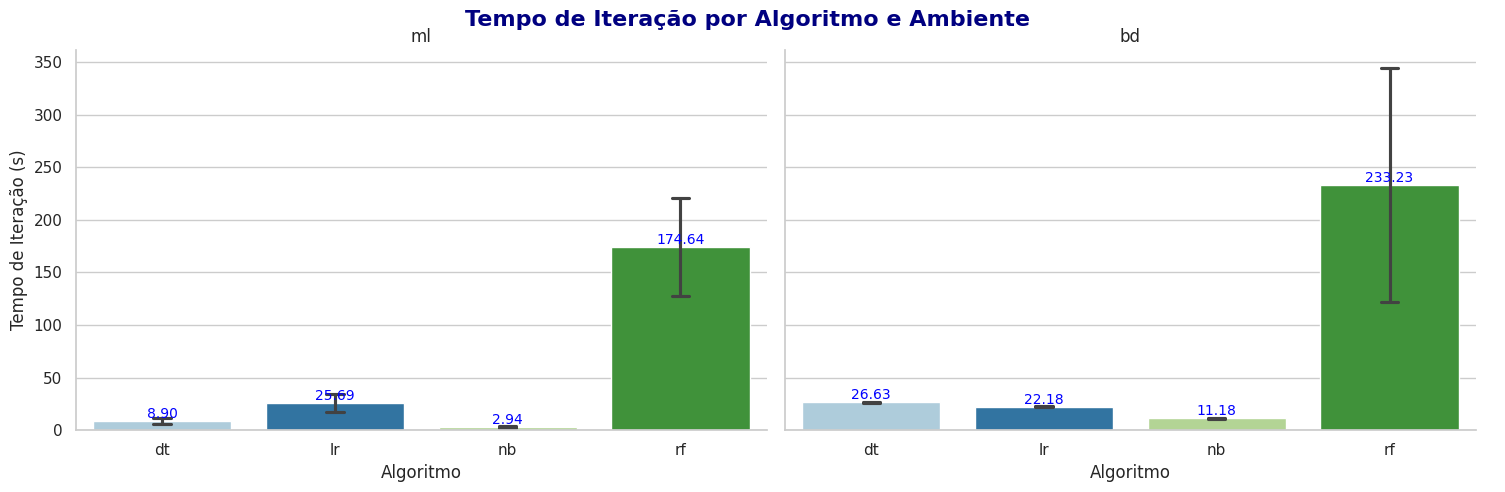

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


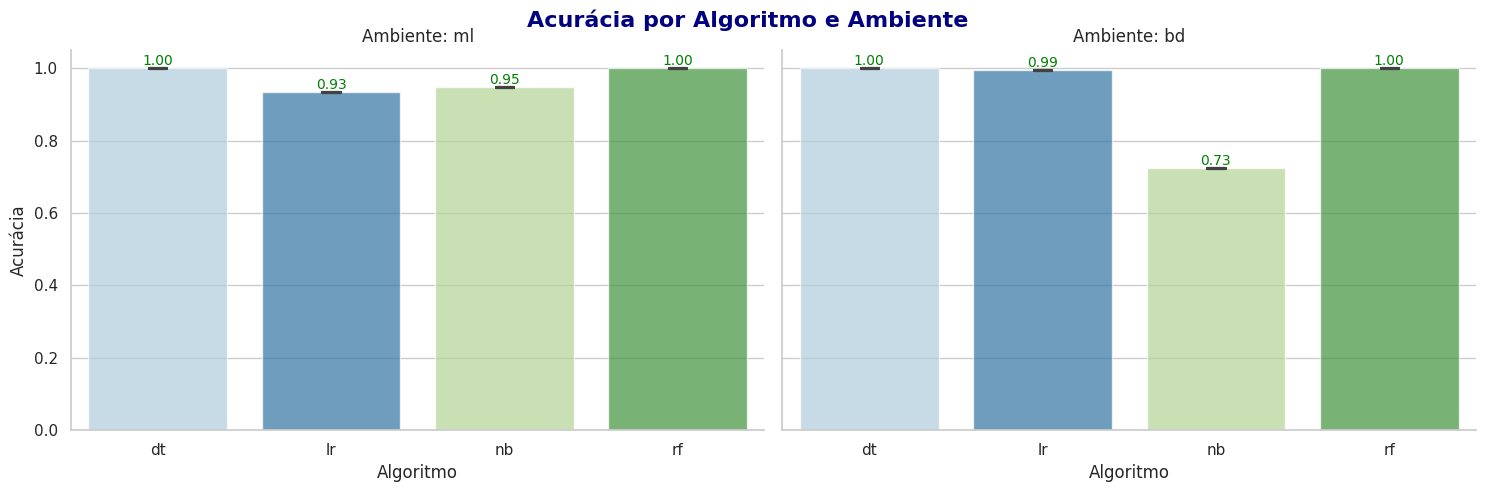

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_results(arquivo_resultados):
    # Carregar os dados do arquivo CSV
    resultados = pd.read_csv(arquivo_resultados)

    # Extrair os números das colunas e converter para floats
    resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
    resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

    # Definir o estilo do seaborn
    sns.set_theme(style="whitegrid")

    # Criar um FacetGrid para o tempo de iteração
    g_tempo = sns.FacetGrid(resultados, col="ambiente", height=5, aspect=1.5)
    g_tempo.map_dataframe(sns.barplot, x="algoritmo", y="iteracoes_tempo", ci="sd", palette="Paired", capsize=0.1)
    g_tempo.add_legend()
    g_tempo.set_axis_labels("Algoritmo", "Tempo de Iteração (s)")
    g_tempo.set_titles("{col_name}")
    for ax in g_tempo.axes.flatten():
        for c in ax.containers:
            labels = [f'{v.get_height():.2f}' for v in c]
            ax.bar_label(c, labels=labels, label_type='edge', fontsize=10, color='blue')
    plt.subplots_adjust(top=0.9)
    g_tempo.fig.suptitle('Tempo de Iteração por Algoritmo e Ambiente', fontsize=16, weight='bold', color='navy')
    g_tempo.savefig("facetgrid_tempo_por_algoritmo_e_ambiente.png", bbox_inches='tight')
    plt.show()

    # Criar um FacetGrid para a acurácia
    g_acuracia = sns.FacetGrid(resultados, col="ambiente", height=5, aspect=1.5)
    g_acuracia.map_dataframe(sns.barplot, x="algoritmo", y="iteracoes_acuracia", ci="sd", palette="Paired", alpha=0.7, capsize=0.1)
    g_acuracia.add_legend()
    g_acuracia.set_axis_labels("Algoritmo", "Acurácia")
    g_acuracia.set_titles("Ambiente: {col_name}")
    for ax in g_acuracia.axes.flatten():
        for c in ax.containers:
            labels = [f'{v.get_height():.2f}' for v in c]
            ax.bar_label(c, labels=labels, label_type='edge', fontsize=10, color='green')
    plt.subplots_adjust(top=0.9)
    g_acuracia.fig.suptitle('Acurácia por Algoritmo e Ambiente', fontsize=16, weight='bold', color='navy')
    g_acuracia.savefig("facetgrid_acuracia_por_algoritmo_e_ambiente.png", bbox_inches='tight')
    plt.show()

# Exemplo de uso:
plot_results('resultado.csv')


<ipython-input-7-e9c4513d1ac8>:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax_tempo = sns.barplot(x="algoritmo", y="iteracoes_tempo", ci="sd", data=dados_ambiente, capsize=0.1, palette="Paired")
<ipython-input-7-e9c4513d1ac8>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_tempo = sns.barplot(x="algoritmo", y="iteracoes_tempo", ci="sd", data=dados_ambiente, capsize=0.1, palette="Paired")


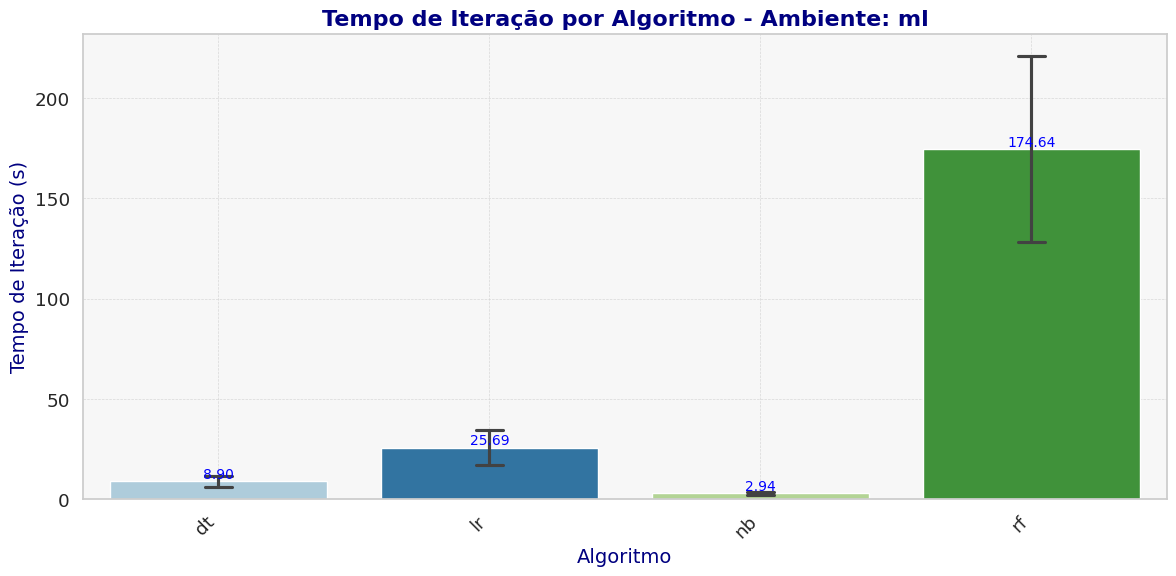

<ipython-input-7-e9c4513d1ac8>:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax_acuracia = sns.barplot(x="algoritmo", y="iteracoes_acuracia", ci="sd", data=dados_ambiente, alpha=0.7, capsize=0.1, palette="Paired")
<ipython-input-7-e9c4513d1ac8>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_acuracia = sns.barplot(x="algoritmo", y="iteracoes_acuracia", ci="sd", data=dados_ambiente, alpha=0.7, capsize=0.1, palette="Paired")


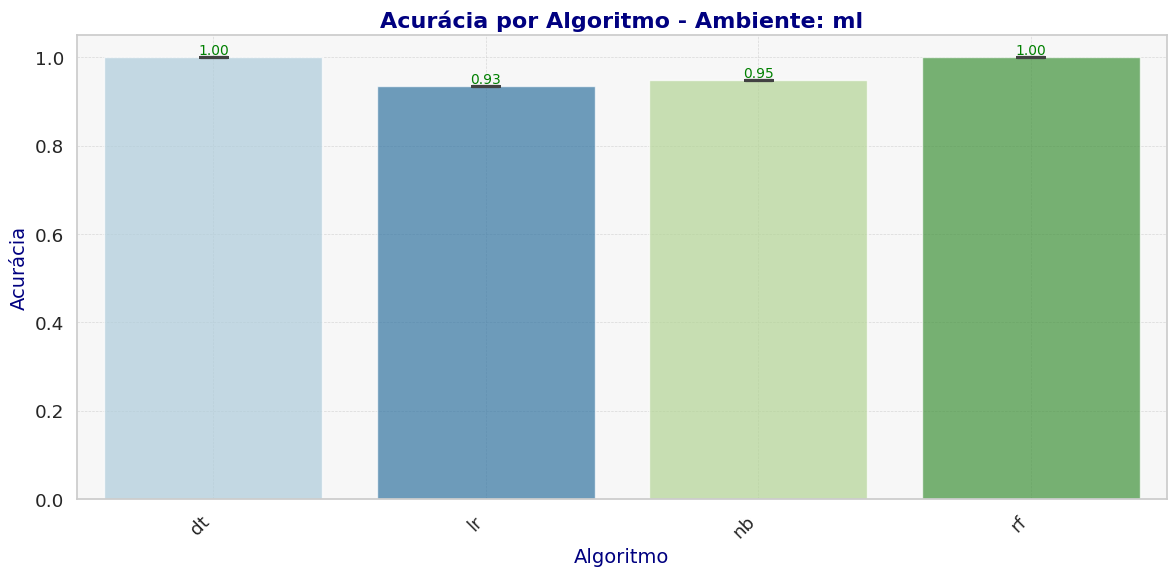

<ipython-input-7-e9c4513d1ac8>:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax_tempo = sns.barplot(x="algoritmo", y="iteracoes_tempo", ci="sd", data=dados_ambiente, capsize=0.1, palette="Paired")
<ipython-input-7-e9c4513d1ac8>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_tempo = sns.barplot(x="algoritmo", y="iteracoes_tempo", ci="sd", data=dados_ambiente, capsize=0.1, palette="Paired")


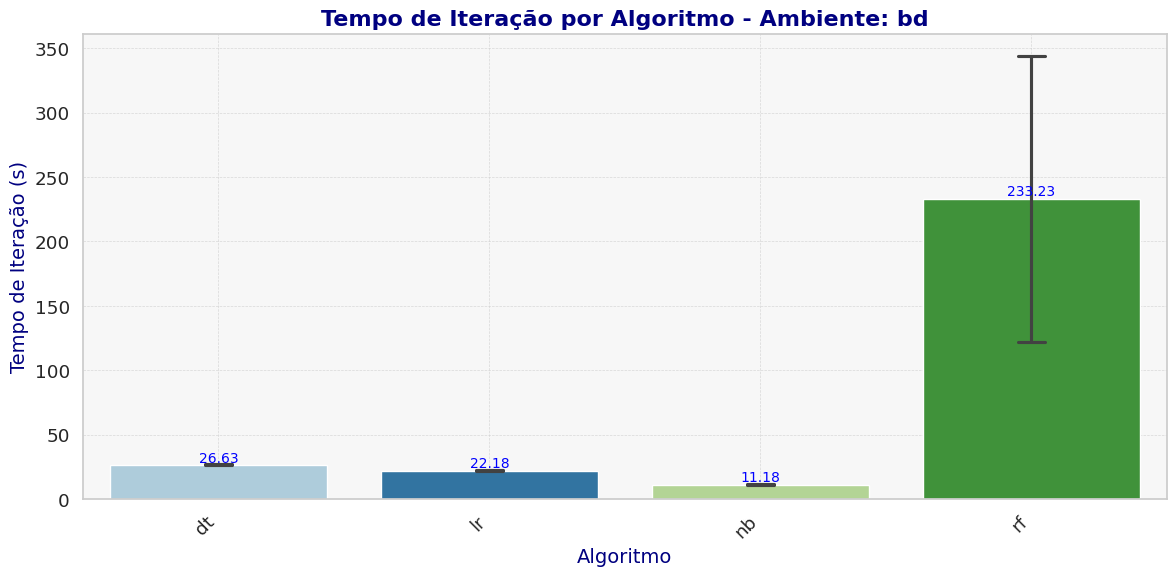

<ipython-input-7-e9c4513d1ac8>:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax_acuracia = sns.barplot(x="algoritmo", y="iteracoes_acuracia", ci="sd", data=dados_ambiente, alpha=0.7, capsize=0.1, palette="Paired")
<ipython-input-7-e9c4513d1ac8>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_acuracia = sns.barplot(x="algoritmo", y="iteracoes_acuracia", ci="sd", data=dados_ambiente, alpha=0.7, capsize=0.1, palette="Paired")


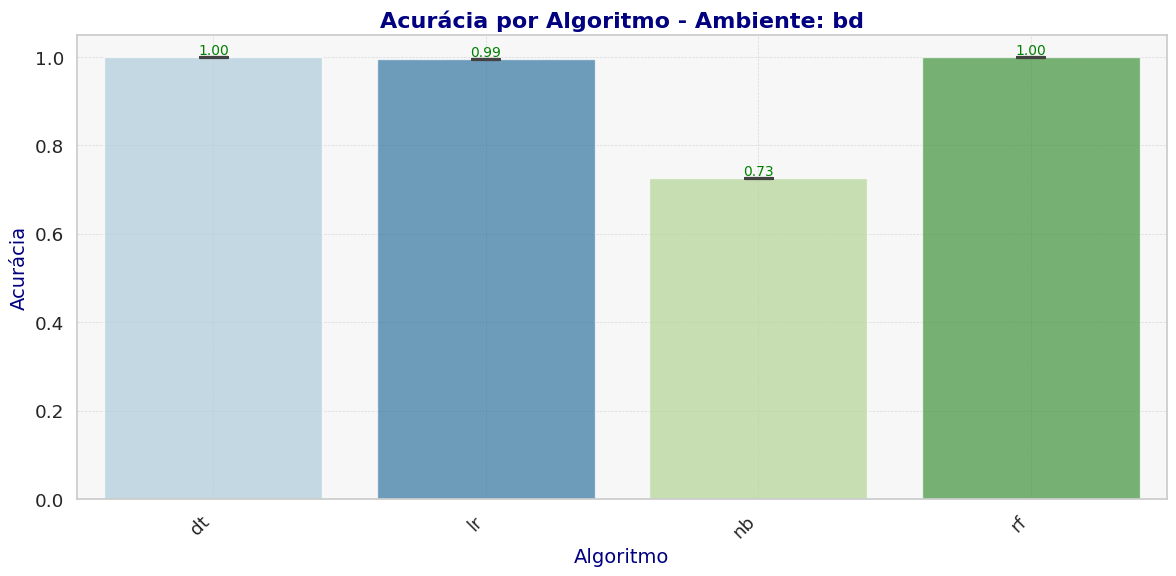

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_results(arquivo_resultados):
    # Carregar os dados do arquivo CSV
    resultados = pd.read_csv(arquivo_resultados)

    # Extrair os números das colunas e converter para floats
    resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
    resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

    # Definir o estilo do seaborn
    sns.set_theme(style="whitegrid", palette="Paired", font_scale=1.2)

    # Lista de ambientes únicos
    ambientes = resultados['ambiente'].unique()

    for ambiente in ambientes:
        # Filtrar os dados para o ambiente atual
        dados_ambiente = resultados[resultados['ambiente'] == ambiente]

        # Gráfico de barras para o tempo de iteração
        plt.figure(figsize=(12, 6))
        ax_tempo = sns.barplot(x="algoritmo", y="iteracoes_tempo", ci="sd", data=dados_ambiente, capsize=0.1, palette="Paired")
        ax_tempo.set_title(f'Tempo de Iteração por Algoritmo - Ambiente: {ambiente}', fontsize=16, weight='bold', color='navy')
        ax_tempo.set_xlabel('Algoritmo', fontsize=14, color='navy')
        ax_tempo.set_ylabel('Tempo de Iteração (s)', fontsize=14, color='navy')
        ax_tempo.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
        ax_tempo.set_facecolor('#f7f7f7')
        for c in ax_tempo.containers:
            labels = [f'{v.get_height():.2f}' for v in c]
            ax_tempo.bar_label(c, labels=labels, label_type='edge', fontsize=10, color='blue')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig(f"tempo_iteracao_{ambiente}.png", bbox_inches='tight')
        plt.show()

        # Gráfico de barras para a acurácia
        plt.figure(figsize=(12, 6))
        ax_acuracia = sns.barplot(x="algoritmo", y="iteracoes_acuracia", ci="sd", data=dados_ambiente, alpha=0.7, capsize=0.1, palette="Paired")
        ax_acuracia.set_title(f'Acurácia por Algoritmo - Ambiente: {ambiente}', fontsize=16, weight='bold', color='navy')
        ax_acuracia.set_xlabel('Algoritmo', fontsize=14, color='navy')
        ax_acuracia.set_ylabel('Acurácia', fontsize=14, color='navy')
        ax_acuracia.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
        ax_acuracia.set_facecolor('#f7f7f7')
        for c in ax_acuracia.containers:
            labels = [f'{v.get_height():.2f}' for v in c]
            ax_acuracia.bar_label(c, labels=labels, label_type='edge', fontsize=10, color='green')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig(f"acuracia_{ambiente}.png", bbox_inches='tight')
        plt.show()

# Exemplo de uso:
plot_results('resultado.csv')


<ipython-input-6-a8c1c0ea295a>:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax_tempo = sns.barplot(x="algoritmo", y="iteracoes_tempo", ci="sd", data=dados_ambiente, capsize=0.1)


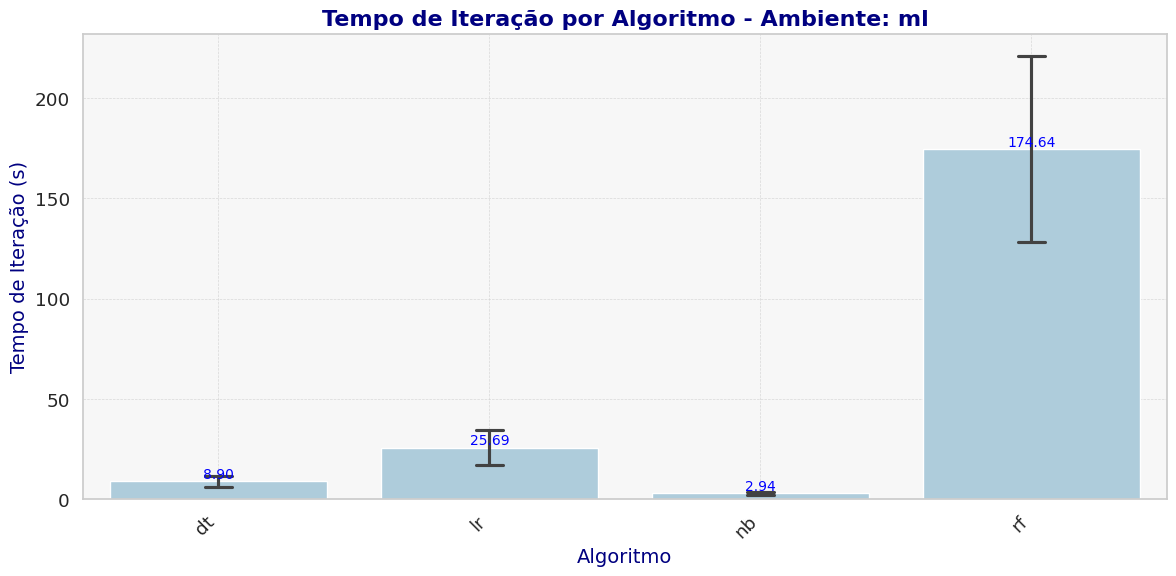

<ipython-input-6-a8c1c0ea295a>:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax_acuracia = sns.barplot(x="algoritmo", y="iteracoes_acuracia", ci="sd", data=dados_ambiente, alpha=0.7, capsize=0.1)


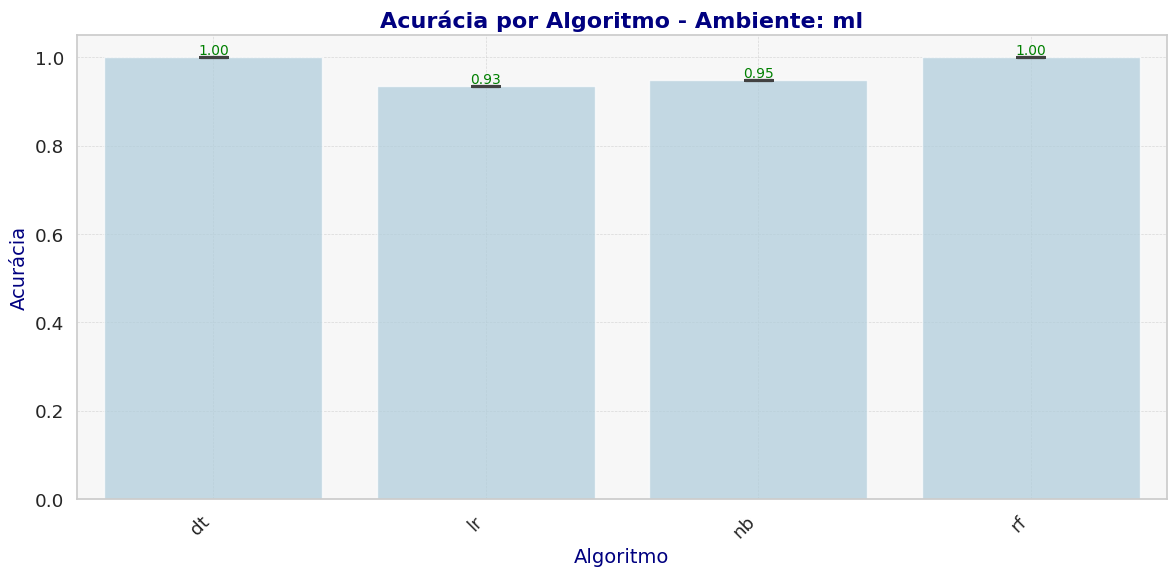

<ipython-input-6-a8c1c0ea295a>:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax_tempo = sns.barplot(x="algoritmo", y="iteracoes_tempo", ci="sd", data=dados_ambiente, capsize=0.1)


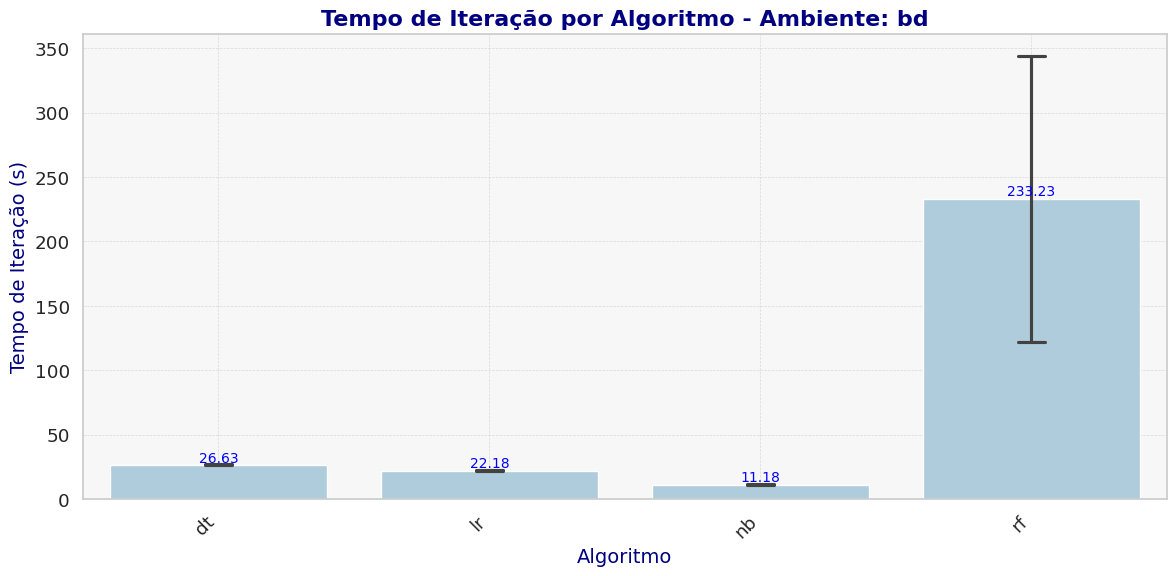

<ipython-input-6-a8c1c0ea295a>:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax_acuracia = sns.barplot(x="algoritmo", y="iteracoes_acuracia", ci="sd", data=dados_ambiente, alpha=0.7, capsize=0.1)


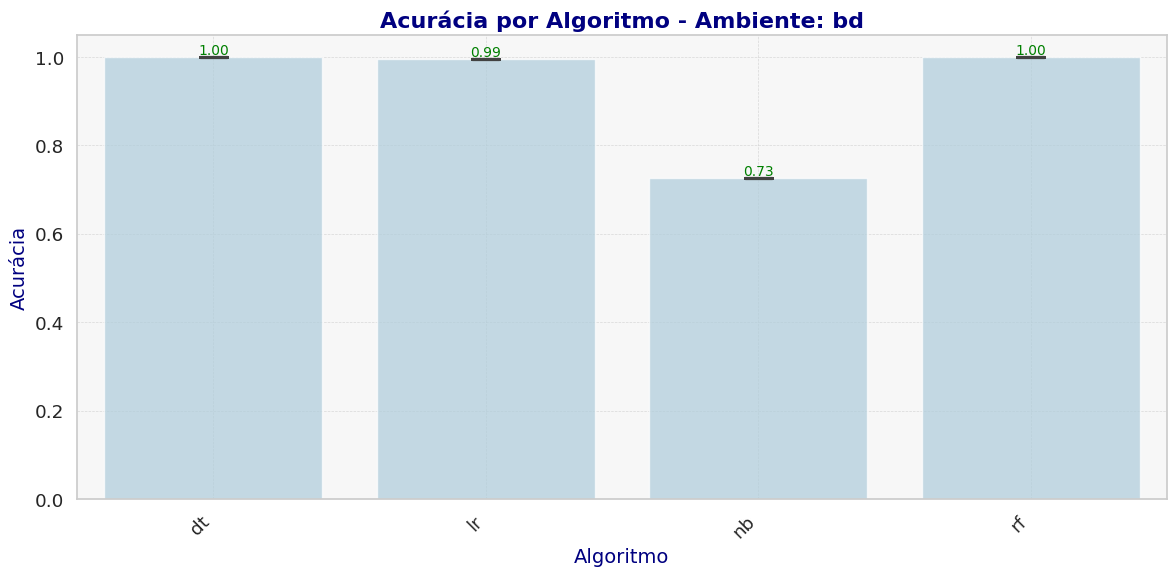

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_results(arquivo_resultados):
    # Carregar os dados do arquivo CSV
    resultados = pd.read_csv(arquivo_resultados)

    # Extrair os números das colunas e converter para floats
    resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
    resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

    # Definir o estilo do seaborn
    sns.set_theme(style="whitegrid", palette="Paired", font_scale=1.2)

    # Lista de ambientes únicos
    ambientes = resultados['ambiente'].unique()

    for ambiente in ambientes:
        # Filtrar os dados para o ambiente atual
        dados_ambiente = resultados[resultados['ambiente'] == ambiente]

        # Gráfico de barras para o tempo de iteração
        plt.figure(figsize=(12, 6))
        ax_tempo = sns.barplot(x="algoritmo", y="iteracoes_tempo", ci="sd", data=dados_ambiente, capsize=0.1)
        ax_tempo.set_title(f'Tempo de Iteração por Algoritmo - Ambiente: {ambiente}', fontsize=16, weight='bold', color='navy')
        ax_tempo.set_xlabel('Algoritmo', fontsize=14, color='navy')
        ax_tempo.set_ylabel('Tempo de Iteração (s)', fontsize=14, color='navy')
        ax_tempo.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
        ax_tempo.set_facecolor('#f7f7f7')
        for c in ax_tempo.containers:
            labels = [f'{v.get_height():.2f}' for v in c]
            ax_tempo.bar_label(c, labels=labels, label_type='edge', fontsize=10, color='blue')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig(f"tempo_iteracao_{ambiente}.png", bbox_inches='tight')
        plt.show()

        # Gráfico de barras para a acurácia
        plt.figure(figsize=(12, 6))
        ax_acuracia = sns.barplot(x="algoritmo", y="iteracoes_acuracia", ci="sd", data=dados_ambiente, alpha=0.7, capsize=0.1)
        ax_acuracia.set_title(f'Acurácia por Algoritmo - Ambiente: {ambiente}', fontsize=16, weight='bold', color='navy')
        ax_acuracia.set_xlabel('Algoritmo', fontsize=14, color='navy')
        ax_acuracia.set_ylabel('Acurácia', fontsize=14, color='navy')
        ax_acuracia.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
        ax_acuracia.set_facecolor('#f7f7f7')
        for c in ax_acuracia.containers:
            labels = [f'{v.get_height():.2f}' for v in c]
            ax_acuracia.bar_label(c, labels=labels, label_type='edge', fontsize=10, color='green')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig(f"acuracia_{ambiente}.png", bbox_inches='tight')
        plt.show()

# Exemplo de uso:
plot_results('resultado.csv')


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)


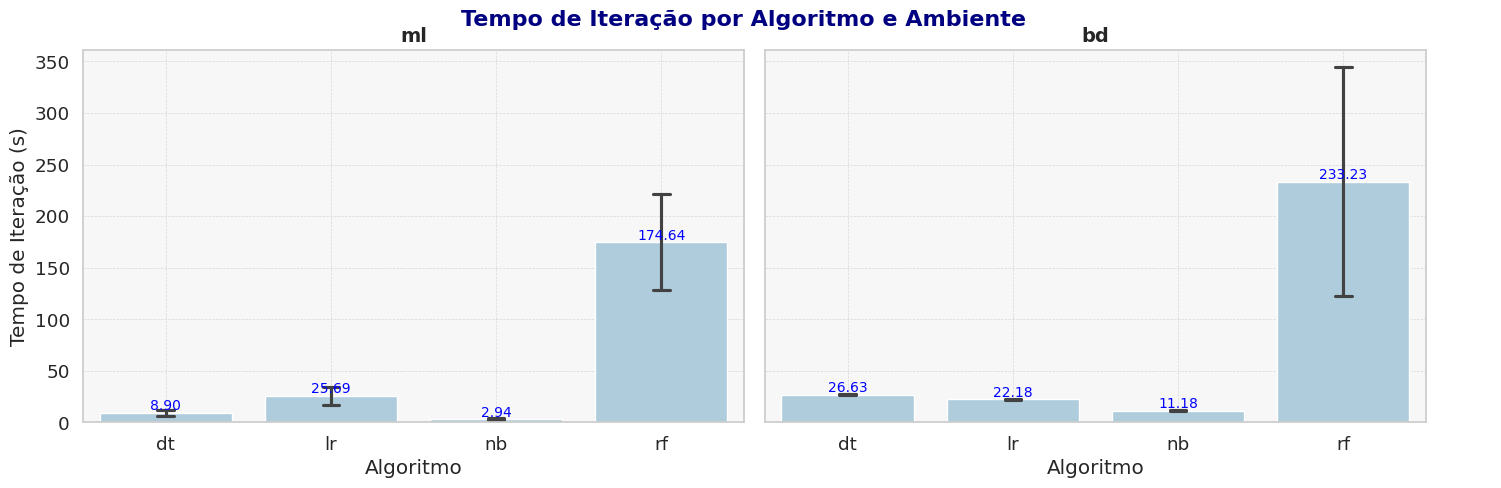

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)


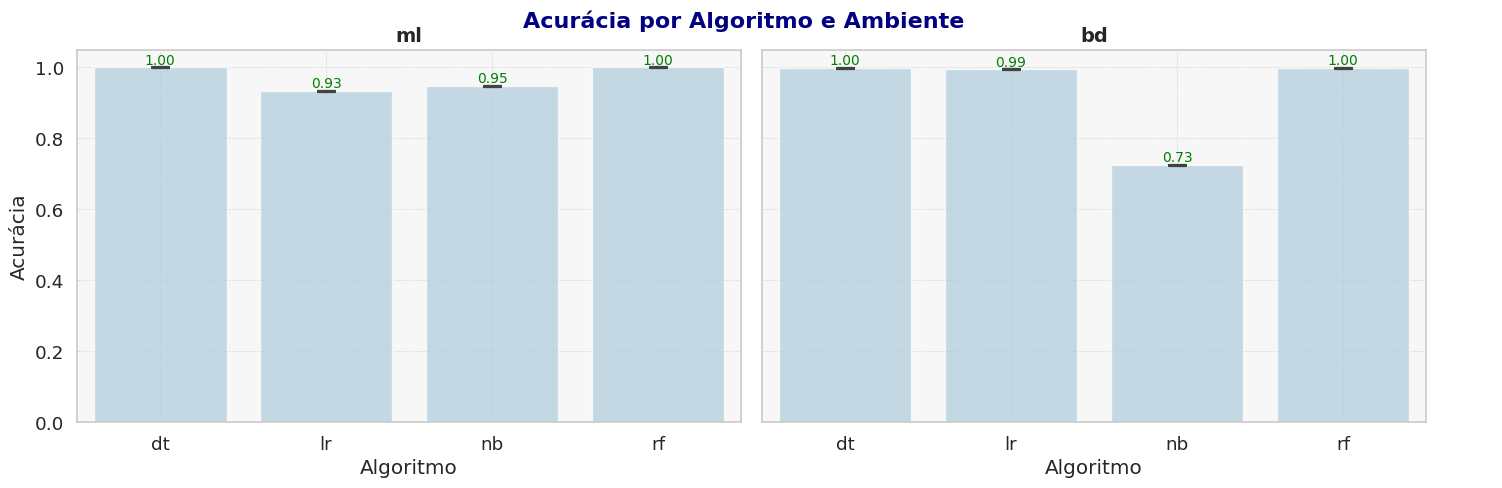

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_results(arquivo_resultados):
    # Carregar os dados do arquivo CSV
    resultados = pd.read_csv(arquivo_resultados)

    # Extrair os números das colunas e converter para floats
    resultados['iteracoes_tempo'] = resultados['iteracoes_tempo'].str.extract(r'(\d+\.\d+)').astype(float)
    resultados['iteracoes_acuracia'] = resultados['iteracoes_acuracia'].str.extract(r'(\d+\.\d+)').astype(float)

    # Definir o estilo do seaborn
    sns.set_theme(style="whitegrid", palette="Paired", font_scale=1.2)

    # Criar um FacetGrid para o tempo de iteração
    g_tempo = sns.FacetGrid(resultados, col="ambiente", height=5, aspect=1.5, despine=False, margin_titles=True)
    g_tempo.map_dataframe(sns.barplot, x="algoritmo", y="iteracoes_tempo", ci="sd", capsize=0.1)
    g_tempo.add_legend()
    g_tempo.set_axis_labels("Algoritmo", "Tempo de Iteração (s)")
    g_tempo.set_titles(col_template="{col_name}", size=14, weight='bold')
    for ax in g_tempo.axes.flatten():
        ax.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
        ax.set_facecolor('#f7f7f7')
        for c in ax.containers:
            labels = [f'{v.get_height():.2f}' for v in c]
            ax.bar_label(c, labels=labels, label_type='edge', fontsize=10, color='blue')
    plt.subplots_adjust(top=0.9)
    g_tempo.fig.suptitle('Tempo de Iteração por Algoritmo e Ambiente', fontsize=16, weight='bold', color='navy')
    g_tempo.savefig("facetgrid_tempo_por_algoritmo_e_ambiente.png", bbox_inches='tight')
    plt.show()

    # Criar um FacetGrid para a acurácia
    g_acuracia = sns.FacetGrid(resultados, col="ambiente", height=5, aspect=1.5, despine=False, margin_titles=True)
    g_acuracia.map_dataframe(sns.barplot, x="algoritmo", y="iteracoes_acuracia", ci="sd", alpha=0.7, capsize=0.1)
    g_acuracia.add_legend()
    g_acuracia.set_axis_labels("Algoritmo", "Acurácia")
    g_acuracia.set_titles(col_template="{col_name}", size=14, weight='bold')
    for ax in g_acuracia.axes.flatten():
        ax.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
        ax.set_facecolor('#f7f7f7')
        for c in ax.containers:
            labels = [f'{v.get_height():.2f}' for v in c]
            ax.bar_label(c, labels=labels, label_type='edge', fontsize=10, color='green')
    plt.subplots_adjust(top=0.9)
    g_acuracia.fig.suptitle('Acurácia por Algoritmo e Ambiente', fontsize=16, weight='bold', color='navy')
    g_acuracia.savefig("facetgrid_acuracia_por_algoritmo_e_ambiente.png", bbox_inches='tight')
    plt.show()

# Exemplo de uso:
plot_results('resultado.csv')
